# <center>COLLABORATIVE FILTERING</center>

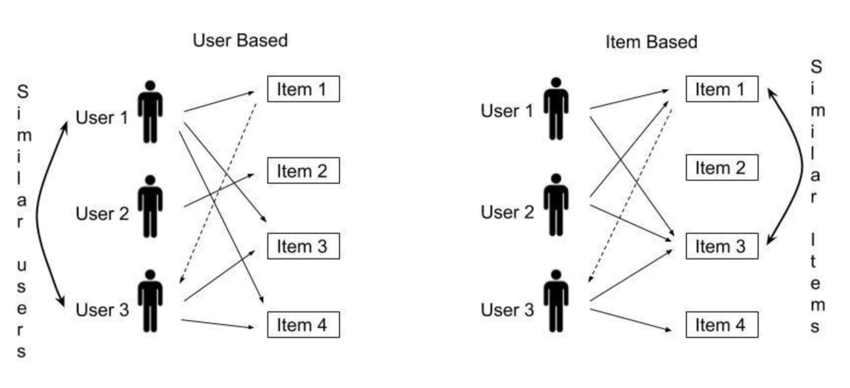


# **Collaborative Filtering**

Our content based engine suffers from some severe limitations. It is only capable of suggesting movies which are close to a certain movie. That is, it is not capable of capturing tastes and providing recommendations across genres.

Also, the engine that we built is not really personal in that it doesn't capture the personal tastes and biases of a user. Anyone querying our engine for recommendations based on a movie will receive the same recommendations for that movie, regardless of who she/he is.

To address some of the limitations of content-based filtering, collaborative filtering uses similarities between users and items simultaneously to provide recommendations. This allows for serendipitous recommendations; that is, collaborative filtering models can recommend an item to user A based on the interests of a similar user B. Furthermore, the embeddings can be learned automatically, without relying on hand-engineering of features.
A Movie Recommendation Example

Consider a movie recommendation system the feedback about movies falls into one of two categories:

   - **Explicit**— users specify how much they liked a particular movie by providing a numerical rating.
   - **Implicit**— if a user watches a movie, the system infers that the user is interested.

It is basically of two types:-

*  **User based filtering**-  These systems recommend products to a user that similar users have liked. For measuring the similarity between two users we can either use pearson correlation or cosine similarity.

* **Item Based Collaborative Filtering** - Instead of measuring the similarity between users, the item-based CF recommends items based on their similarity with the items that the target user rated. Likewise, the similarity can be computed with Pearson Correlation or Cosine Similarity. The major difference is that, with item-based collaborative filtering, we fill in the blank vertically, as oppose to the horizontal manner that user-based CF does. 

It successfully avoids the problem posed by dynamic user preference as item-based CF is more static. However, several problems remain for this method. 

First, the main issue is ***scalability***. The computation grows with both the customer and the product. The worst case complexity is O(mn) with m users and n items. 

In addition, ***sparsity*** is another concern. Take a look at the above table again. Although there is only one user that rated both Matrix and Titanic rated, the similarity between them is 1. In extreme cases, we can have millions of users and the similarity between two fairly different movies could be very high simply because they have similar rank for the only user who ranked them both.



**Example**

## User Based Collaborative

User-based collaborative filtering predicts a user's preferences by leveraging the preferences of other similar users. The formula for user-based collaborative filtering can be represented as follows:

$\hat{r}_{ui} = \bar{r}_u + \frac{\sum_{v \in N(u)} \text{sim}(u, v) \cdot (r_{vi} - \bar{r}_v)}{\sum_{v \in N(u)} |\text{sim}(u, v)|}$

Where:
$\hat{r}_{ui}$ is the predicted rating of user $u$ for item $i$.

$\bar{r}_u$ is the average rating of user $u$.

$N(u)$ is the set of users similar to user $u$ (neighborhood of user $u$).

$\text{sim}(u, v)$ is the similarity between users $u$ and $v$.

$r_{vi}$ is the rating of user $v$ for item $i$.

$\bar{r}_v$ is the average rating of user $v$.


## Item-based Collaborative Filtering

Item-based collaborative filtering predicts a user's preferences based on the preferences of similar items. The formula for item-based collaborative filtering is as follows:

$\hat{r}_{ui} = \frac{\sum_{j \in N(i)} \text{sim}(i, j) \cdot r_{uj}}{\sum_{j \in N(i)} |\text{sim}(i, j)|}$

Where:
$\hat{r}_{ui}$ is the predicted rating of user $u$ for item $i$.

$N(i)$ is the set of items similar to item $i$ (neighborhood of item $i$).

$\text{sim}(i, j)$ is the similarity between items $i$ and $j$.

$r_{uj}$ is the rating of user $u$ for item $j$.


**Example**

Consider the following data set:

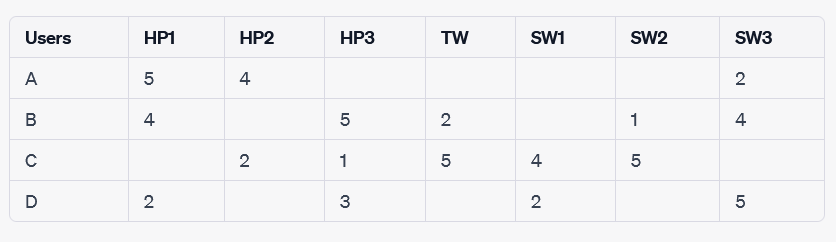

**Step 1: Calculate the average of each row and store it in a column named mean_rating**

The mean rating for each user can be calculated by summing up the ratings and dividing by the number of non-empty ratings for that user.



Updated Data Set with mean_rating column:

![](t2.png)

**Step 2: Subtract mean_rating from each column**

Subtract the mean_rating of each user from the corresponding movie ratings.

**Step 3: Calculate the cosine similarities for each column except mean_rating**

Let's calculate the cosine similarity between movies, excluding the mean\_rating column.

![](t3.png)

![](cos.jpg)


item Similarity between HP1 and HP2: 
$\text{sim}(HP1, HP2) = \frac{(1.33 \cdot 0.33)}{\sqrt{(1.33^2)} \cdot \sqrt{(0.33^2)}} = 0.249$

item Similarity between HP1 and HP3:
$\text{sim}(HP1, HP3) = \frac{(1.33 \cdot -2.40)}{\sqrt{(1.33^2)} \cdot \sqrt{(-2.40^2)}} = -0.714$

item Similarity between HP1 and TW:
$\text{sim}(HP1, TW) = \frac{(1.33 \cdot -1.20)}{\sqrt{(1.33^2)} \cdot \sqrt{(-1.20^2)}} = -0.354$

item Similarity between HP1 and SW1:
$\text{sim}(HP1, SW1) = \frac{(1.33 \cdot 0.60)}{\sqrt{(1.33^2)} \cdot \sqrt{(0.60^2)}} = 0.199$

item Similarity between HP1 and SW2:
$\text{sim}(HP1, SW2) = \frac{(1.33 \cdot 1.60)}{\sqrt{(1.33^2)} \cdot \sqrt{(1.60^2)}} = 0.428$

item Similarity between HP1 and SW3:
$\text{sim}(HP1, SW3) = \frac{(1.33 \cdot -1.67)}{\sqrt{(1.33^2)} \cdot \sqrt{(-1.67^2)}} = -0.352$



Similarly, calculate cosine similarities for all other pairs of movies.

**Step 4: Remove the mean_rating column**

Now that we have calculated the cosine similarities between movies, we can remove the mean_rating column from the data set.

![](t4.png)

**Step 5: Use the formula**

$r_{xi} = \frac{\sum (s_{ij} \cdot r_{xj})}{\sum s_{ij}}$}

Now, we'll use the user-based collaborative filtering formula to predict the ratings for the missing values (empty cells) in the data set.

Let's predict the rating for User C and Movie HP3:

$r_{C, HP3} = \frac{(0.249 \cdot -1.40 + -0.714 \cdot -2.40 + -0.354 \cdot 1.60 + 0.199 \cdot 0.60 + 0.428 \cdot 1.60 + -0.352 \cdot 2.00)}{(0.249 + 0.714 + 0.354 + 0.199 + 0.428 + 0.352)}$

$r_{C, HP3} = \frac{-0.348 - 1.714 - 0.566 + 0.119 + 0.684 - 0.704}{2.296} = -1.65$

So, the predicted rating for User C and Movie HP3 using user-based collaborative filtering is -1.65.

**Step 6: Conclude the result**

Repeat Step 5 for all the missing values in the data set to predict the ratings using user-based collaborative filtering. Similarly, you can use item-based collaborative filtering by transposing the data set and applying the steps to predict ratings for missing values.

Remember, collaborative filtering is just one of many recommendation algorithms, and its performance may vary depending on the data and the specific problem. In practice, real-world recommendation systems often use hybrid approaches, matrix factorization, or deep learning models for better accuracy and scalability.

![](https://miro.medium.com/v2/resize:fit:801/1*skK2fqWiBF7weHU8SjuCzw.png)

# Step 1: Create a Custom Data Set

In [1]:
#import sklearn library
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

In [152]:
#dictionary with usernames their watched web series and ratings out of 5

dataset={
        'Akshay': {'Special Ops': 5,
                  'Criminal Justice': 3,
                  'Panchayat': 3,
                  'Sacred Games': 3,
                  'Apharan': 2,
                  'Mirzapur': 3},
    
        'Rishi': {'Special Ops': 5,
                    'Criminal Justice': 3,
                    'Sacred Games': 5,
                    'Panchayat':5,
                    'Mirzapur': 3,
                    'Apharan': 3},
    
        'Sonali': {'Special Ops': 2,
                   'Panchayat': 5,
                   'Sacred Games': 3,
                   'Mirzapur': 4},
    
        'Ritvik': {'Panchayat': 5,
                   'Mirzapur': 4,
                   'Sacred Games': 4,},
    
       'Harsh': {'Special Ops': 4,
                    'Criminal Justice': 4,
                    'Panchayat': 4,
                    'Mirzapur': 3,
                    'Apharan': 2},
    
       'SRK': {'Special Ops': 3,
                  'Panchayat': 4,
                  'Mirzapur': 3,
                  'Sacred Games': 5,
                  'Apharan': 3},
    
      'Salman': {'Panchayat':4,
                  'Apharan':1,
                  'Sacred Games':4}}

In [153]:
#create a data frame of this dataset
dataset_df=pd.DataFrame(dataset)
dataset_df.head()

,Akshay,Rishi,Sonali,Ritvik,Harsh,SRK,Salman
Special Ops,5,5,2.0,NaN,4.0,3.0,NaN
Criminal Justice,3,3,NaN,NaN,4.0,NaN,NaN
Panchayat,3,5,5.0,5.0,4.0,4.0,4.0
Sacred Games,3,5,3.0,4.0,NaN,5.0,4.0
Apharan,2,3,NaN,NaN,2.0,3.0,1.0


In [154]:
# dataset_df.to_csv('data.csv')

In [155]:

dataset_df.fillna("Not Seen Yet",inplace=True)
dataset_df

,Akshay,Rishi,Sonali,Ritvik,Harsh,SRK,Salman
Special Ops,5,5,2.0,Not Seen Yet,4.0,3.0,Not Seen Yet
Criminal Justice,3,3,Not Seen Yet,Not Seen Yet,4.0,Not Seen Yet,Not Seen Yet
Panchayat,3,5,5.0,5.0,4.0,4.0,4.0
Sacred Games,3,5,3.0,4.0,Not Seen Yet,5.0,4.0
Apharan,2,3,Not Seen Yet,Not Seen Yet,2.0,3.0,1.0
Mirzapur,3,3,4.0,4.0,3.0,3.0,Not Seen Yet


In [156]:
# custom function to create unique set of web series

def unique_items():
    unique_items_list = []
    for person in dataset.keys():
        for items in dataset[person]:
            unique_items_list.append(items)
    s=set(unique_items_list)
    unique_items_list=list(s)
    return unique_items_list

In [157]:
unique_items()

['Apharan',
 'Sacred Games',
 'Special Ops',
 'Criminal Justice',
 'Panchayat',
 'Mirzapur']

# Cosine Similarity
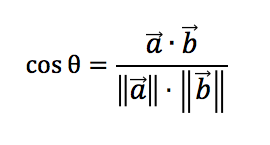

### Find the Ratings of the movies for cosine similarity calculations

In [158]:
both_rated = {}
for person in dataset.keys():
    if 'Special Ops' in dataset[person] and 'Criminal Justice' in dataset[person]:
        both_rated[person] = [dataset[person]['Special Ops'],dataset[person]['Criminal Justice']]

In [159]:
both_rated

{'Akshay': [5, 3], 'Rishi': [5, 3], 'Harsh': [4, 4]}

In [160]:
number_of_ratings = len(both_rated)
number_of_ratings

3

In [161]:
both_rated.items()

dict_items([('Akshay', [5, 3]), ('Rishi', [5, 3]), ('Harsh', [4, 4])])

In [162]:
both_rated.keys()

dict_keys(['Akshay', 'Rishi', 'Harsh'])

In [163]:
both_rated.values()

dict_values([[5, 3], [5, 3], [4, 4]])

In [164]:
item1='Special Ops'
item2='Criminal Justice'

In [165]:
item1_ratings = [[dataset[k][item1] for k,v in both_rated.items() if item1 in dataset[k] and item2 in dataset[k]]]
item2_ratings = [[dataset[k][item2] for k, v in both_rated.items() if item1 in dataset[k] and item2 in dataset[k]]]
print("{} ratings :: {}".format(item1,item1_ratings))
print("{} ratings :: {}".format(item2,item2_ratings))

Special Ops ratings :: [[5, 5, 4]]
Criminal Justice ratings :: [[3, 3, 4]]


In [166]:
cs = cosine_similarity(item1_ratings,item2_ratings)
cs

array([[0.97106076]])

In [167]:
cs[0]

array([0.97106076])

In [168]:
cs[0][0]

0.9710607611177227

### custom function to implement cosine similarity between two items i.e. web series

In [169]:
# custom function to implement cosine similarity between two items i.e. web series

def item_similarity(item1,item2):
    both_rated = {}
    for person in dataset.keys():
        if item1 in dataset[person] and item2 in dataset[person]:
            both_rated[person] = [dataset[person][item1],dataset[person][item2]]

    #print(both_rated)
    number_of_ratings = len(both_rated)
    if number_of_ratings == 0:
        return 0

    item1_ratings = [[dataset[k][item1] for k,v in both_rated.items() if item1 in dataset[k] and item2 in dataset[k]]]
    item2_ratings = [[dataset[k][item2] for k, v in both_rated.items() if item1 in dataset[k] and item2 in dataset[k]]]
    #print("{} ratings :: {}".format(item1,item1_ratings))
    #print("{} ratings :: {}".format(item2,item2_ratings))
    cs = cosine_similarity(item1_ratings,item2_ratings)
    return cs[0][0]

In [170]:
print("Cosine Similarity:: ",item_similarity('Criminal Justice','Special Ops'))

Cosine Similarity::  0.9710607611177227


## Phase 1: Item Similarity between multiple items

In [171]:
un_lst=unique_items()
un_lst

['Apharan',
 'Sacred Games',
 'Special Ops',
 'Criminal Justice',
 'Panchayat',
 'Mirzapur']

In [172]:
target_item='Apharan'

In [173]:
scores = [(target_item+" --> "+other_item+" --> ",item_similarity(target_item,other_item)) for other_item in un_lst if other_item!=target_item]
scores.sort(reverse=True)

In [174]:
scores

[('Apharan --> Special Ops --> ', 0.9511127086814604),
 ('Apharan --> Sacred Games --> ', 0.9630868246861537),
 ('Apharan --> Panchayat --> ', 0.9563650695950073),
 ('Apharan --> Mirzapur --> ', 0.9805806756909202),
 ('Apharan --> Criminal Justice --> ', 0.9566738804288584)]

In [175]:
#custom function to check most similar items 

def most_similar_items(target_item):
    un_lst=unique_items()
    scores = [(target_item+" --> "+other_item+" --> ",item_similarity(target_item,other_item)) for other_item in un_lst if other_item!=target_item]
    scores.sort(reverse=True)
    return scores

In [176]:
most_similar_items('Panchayat')

[('Panchayat --> Special Ops --> ', 0.9199418174856334),
 ('Panchayat --> Sacred Games --> ', 0.9749005254295224),
 ('Panchayat --> Mirzapur --> ', 0.990830168044299),
 ('Panchayat --> Criminal Justice --> ', 0.9701425001453318),
 ('Panchayat --> Apharan --> ', 0.9563650695950073)]

In [177]:
target_person='Ritvik'
target_person_movie_lst = []
unique_list =unique_items()
for movies in dataset[target_person]:
    target_person_movie_lst.append(movies)

In [178]:
target_person_movie_lst

['Panchayat', 'Mirzapur', 'Sacred Games']

In [179]:
s=set(unique_list)
recommended_movies=list(s.difference(target_person_movie_lst))
recommended_movies

['Special Ops', 'Criminal Justice', 'Apharan']

In [180]:
a=len(recommended_movies)
a

3

In [181]:
#custom function to filter the seen movies and unseen movies of the target user

def target_movies_to_users(target_person):
    target_person_movie_lst = []
    unique_list =unique_items()
    for movies in dataset[target_person]:
        target_person_movie_lst.append(movies)

    s=set(unique_list)
    recommended_movies=list(s.difference(target_person_movie_lst))
    a = len(recommended_movies)
    if a == 0:
        return 0
    return recommended_movies,target_person_movie_lst

In [182]:
print(target_movies_to_users('Akshay'))

0


In [183]:
# function check

name=input()
if target_movies_to_users(name)==0:
    print(name,'has seen all the movies')

else:
    unseen_movies,seen_movies=target_movies_to_users(name)
    dct = {"Unseen Movies":unseen_movies,"Seen Movies":seen_movies}
    for k,v in dct.items():
        print('{} ---------> {}'.format(k,v),end='\n')

Salman
Unseen Movies ---------> ['Special Ops', 'Criminal Justice', 'Mirzapur']
Seen Movies ---------> ['Panchayat', 'Apharan', 'Sacred Games']


## Phase 2: Recommendation Phase :: recommending movies to the target user on behalf of item similarity

In [184]:
seen_ratings = [[dataset[name][movies],movies] for movies in dataset[name]]
seen_ratings

[[4, 'Panchayat'], [1, 'Apharan'], [4, 'Sacred Games']]

In [185]:
not_seen_movies,seen_movies=target_movies_to_users(target_person='SRK')
print('not_seen_movies::',not_seen_movies)
print('seen_movies::',seen_movies)

not_seen_movies:: ['Criminal Justice']
seen_movies:: ['Special Ops', 'Panchayat', 'Mirzapur', 'Sacred Games', 'Apharan']


### Use original dataset for dataset_df_normalized

In [187]:
dataset_df_normalized=pd.DataFrame(dataset)

In [188]:
dataset_df_normalized=dataset_df_normalized.replace("Not Seen Yet",0)

In [189]:
dataset_df_normalized

,Akshay,Rishi,Sonali,Ritvik,Harsh,SRK,Salman
Special Ops,5,5,2.0,NaN,4.0,3.0,NaN
Criminal Justice,3,3,NaN,NaN,4.0,NaN,NaN
Panchayat,3,5,5.0,5.0,4.0,4.0,4.0
Sacred Games,3,5,3.0,4.0,NaN,5.0,4.0
Apharan,2,3,NaN,NaN,2.0,3.0,1.0
Mirzapur,3,3,4.0,4.0,3.0,3.0,NaN


### Create a mean column

In [190]:
dataset_df_normalized['mean']=(dataset_df_normalized.mean(axis=1,skipna=True))

### Subtract mean column from each column of dataset_df_normalized

In [191]:
for i in dataset_df_normalized.columns:
    dataset_df_normalized[i]=dataset_df_normalized[i]-dataset_df_normalized['mean']

In [192]:
dataset_df_normalized
    

,Akshay,Rishi,Sonali,Ritvik,Harsh,SRK,Salman,mean
Special Ops,1.200000,1.200000,-1.800000,NaN,0.200000,-0.800000,NaN,0.0
Criminal Justice,-0.333333,-0.333333,NaN,NaN,0.666667,NaN,NaN,0.0
Panchayat,-1.285714,0.714286,0.714286,0.714286,-0.285714,-0.285714,-0.285714,0.0
Sacred Games,-1.000000,1.000000,-1.000000,0.000000,NaN,1.000000,0.000000,0.0
Apharan,-0.200000,0.800000,NaN,NaN,-0.200000,0.800000,-1.200000,0.0
Mirzapur,-0.333333,-0.333333,0.666667,0.666667,-0.333333,-0.333333,NaN,0.0


In [193]:
# drop the mean column
dataset_df_normalized.drop(columns='mean',inplace=True)

In [194]:
dataset_df_normalized

,Akshay,Rishi,Sonali,Ritvik,Harsh,SRK,Salman
Special Ops,1.200000,1.200000,-1.800000,NaN,0.200000,-0.800000,NaN
Criminal Justice,-0.333333,-0.333333,NaN,NaN,0.666667,NaN,NaN
Panchayat,-1.285714,0.714286,0.714286,0.714286,-0.285714,-0.285714,-0.285714
Sacred Games,-1.000000,1.000000,-1.000000,0.000000,NaN,1.000000,0.000000
Apharan,-0.200000,0.800000,NaN,NaN,-0.200000,0.800000,-1.200000
Mirzapur,-0.333333,-0.333333,0.666667,0.666667,-0.333333,-0.333333,NaN


#### Convert dataframe into original dataset dictionary format

In [197]:
# dataset_df_normalized.fillna(0,inplace=True)
# from pandas import compat

def to_dict_dropna(data):
    return dict((k, v.dropna().to_dict()) for k, v in data.items())

my_dict=to_dict_dropna(dataset_df_normalized)

In [198]:
my_dict

{'Akshay': {'Special Ops': 1.2000000000000002,
  'Criminal Justice': -0.3333333333333335,
  'Panchayat': -1.2857142857142856,
  'Sacred Games': -1.0,
  'Apharan': -0.20000000000000018,
  'Mirzapur': -0.3333333333333335},
 'Rishi': {'Special Ops': 1.2000000000000002,
  'Criminal Justice': -0.3333333333333335,
  'Panchayat': 0.7142857142857144,
  'Sacred Games': 1.0,
  'Apharan': 0.7999999999999998,
  'Mirzapur': -0.3333333333333335},
 'Sonali': {'Special Ops': -1.7999999999999998,
  'Panchayat': 0.7142857142857144,
  'Sacred Games': -1.0,
  'Mirzapur': 0.6666666666666665},
 'Ritvik': {'Panchayat': 0.7142857142857144,
  'Sacred Games': 0.0,
  'Mirzapur': 0.6666666666666665},
 'Harsh': {'Special Ops': 0.20000000000000018,
  'Criminal Justice': 0.6666666666666665,
  'Panchayat': -0.2857142857142856,
  'Apharan': -0.20000000000000018,
  'Mirzapur': -0.3333333333333335},
 'SRK': {'Special Ops': -0.7999999999999998,
  'Panchayat': -0.2857142857142856,
  'Sacred Games': 1.0,
  'Apharan': 0.799

In [199]:
dataset=my_dict

In [200]:
not_seen_movies

['Criminal Justice']

In [201]:
seen_ratings

[[4, 'Panchayat'], [1, 'Apharan'], [4, 'Sacred Games']]

### Calculate the similarity score using the below formula

$r_{xi} = \frac{\sum (s_{ij} \cdot r_{xj})}{\sum s_{ij}}$}

In [202]:
weighted_avg,weighted_sim = 0,0
rankings =[]
for i in not_seen_movies:
    for rate,movie in seen_ratings:
        item_sim=item_similarity(i,movie)
        weighted_avg +=(item_sim*rate)
        weighted_sim +=item_sim
        weighted_rank=weighted_avg/weighted_sim
        rankings.append([weighted_rank,i,movie])

rankings.sort(reverse=True)

In [203]:
rankings

[[4.0, 'Criminal Justice', 'Panchayat'],
 [0.9999999999999996, 'Criminal Justice', 'Sacred Games'],
 [0.9999999999999996, 'Criminal Justice', 'Apharan']]

In [204]:

def recommendation_phase(target_person):
    if target_movies_to_users(target_person=target_person) == 0:
        print(target_person, "has seen all the movies")
        return -1
    not_seen_movies,seen_movies=target_movies_to_users(target_person=target_person)
    seen_ratings = [[dataset[target_person][movies],movies] for movies in dataset[target_person]]
    weighted_avg,weighted_sim = 0,0
    rankings =[]
    for i in not_seen_movies:
        for rate,movie in seen_ratings:
            item_sim=item_similarity(i,movie)
            weighted_avg +=(item_sim*rate)
            weighted_sim +=item_sim
        weighted_rank=weighted_avg/weighted_sim
        rankings.append([weighted_rank,i])

    rankings.sort(reverse=True)
    return rankings

### Recommend the movies

In [205]:
print("Enter the target person")
tp = input()
if tp in dataset.keys():
    a=recommendation_phase(tp)
    if a != -1:
        print("Recommendation Using Item based Collaborative Filtering:  ")
        for w,m in a:
            print(m," ---> ",w)
else:
    print("Person not found in the dataset..please try again")

Enter the target person
SRK
Recommendation Using Item based Collaborative Filtering:  
Criminal Justice  --->  0.0027586534921082667
